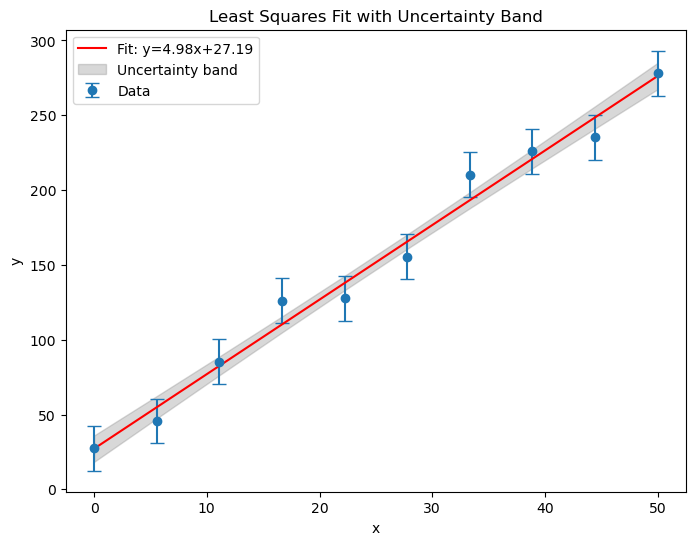

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def linear_model(x, m, b):
    return m * x + b

# Generate synthetic data
np.random.seed(42)
x_data = np.linspace(0, 50, 10)
y_data = 5 * x_data + 20 + np.random.normal(0, 15, size=x_data.shape)  # True line with noise

# Fit using least squares
popt, pcov = curve_fit(linear_model, x_data, y_data, sigma=np.full_like(x_data, 15), absolute_sigma=True)
m0, b0 = popt
Dm, Db = np.sqrt(np.diag(pcov))  # Uncertainties in m and b
cov_mb = pcov[0, 1]  # Covariance term

# Compute the uncertainty band
def prediction_uncertainty(x, m, b, Dm, Db, cov_mb):
    return np.sqrt((x * Dm)**2 + Db**2 + 2 * x * cov_mb)  # Full error propagation formula

y_fit = linear_model(x_data, m0, b0)
y_uncertainty = prediction_uncertainty(x_data, m0, b0, Dm, Db, cov_mb)

# Plot
plt.figure(figsize=(8,6))
plt.errorbar(x_data, y_data, yerr=15, fmt='o', label='Data', capsize=5)
plt.plot(x_data, y_fit, 'r-', label=f'Fit: y={m0:.2f}x+{b0:.2f}')
plt.fill_between(x_data, y_fit - y_uncertainty, y_fit + y_uncertainty, color='grey', alpha=0.3, label='Uncertainty band')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Least Squares Fit with Uncertainty Band')
plt.show()


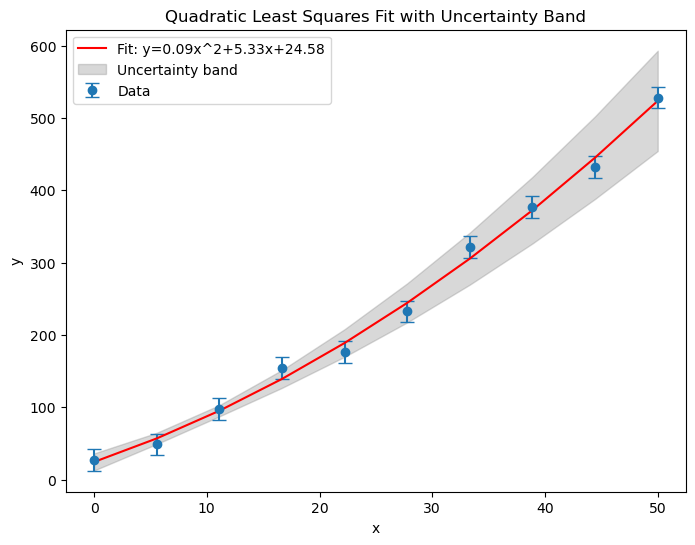

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def quadratic_model(x, a, b, c):
    return a * x**2 + b * x + c

# Generate synthetic data
np.random.seed(42)
x_data = np.linspace(0, 50, 10)
y_data = 0.1 * x_data**2 + 5 * x_data + 20 + np.random.normal(0, 15, size=x_data.shape)  # True quadratic with noise

# Fit using least squares
popt, pcov = curve_fit(quadratic_model, x_data, y_data, sigma=np.full_like(x_data, 15), absolute_sigma=True)
a0, b0, c0 = popt
Da, Db, Dc = np.sqrt(np.diag(pcov))  # Uncertainties in a, b, and c
cov_ab, cov_ac, cov_bc = pcov[0,1], pcov[0,2], pcov[1,2]  # Covariances

# Compute the uncertainty band
def prediction_uncertainty(x, a, b, c, Da, Db, Dc, cov_ab, cov_ac, cov_bc):
    return np.sqrt((x**2 * Da)**2 + (x * Db)**2 + Dc**2 + 2 * x**2 * cov_ab + 2 * x * cov_ac + 2 * x * cov_bc)  # Full error propagation formula

y_fit = quadratic_model(x_data, a0, b0, c0)
y_uncertainty = prediction_uncertainty(x_data, a0, b0, c0, Da, Db, Dc, cov_ab, cov_ac, cov_bc)

# Plot
plt.figure(figsize=(8,6))
plt.errorbar(x_data, y_data, yerr=15, fmt='o', label='Data', capsize=5)
plt.plot(x_data, y_fit, 'r-', label=f'Fit: y={a0:.2f}x^2+{b0:.2f}x+{c0:.2f}')
plt.fill_between(x_data, y_fit - y_uncertainty, y_fit + y_uncertainty, color='grey', alpha=0.3, label='Uncertainty band')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Quadratic Least Squares Fit with Uncertainty Band')
plt.show()
